In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [25]:
import sympy
print(sympy.__version__)

0.7.6.1


In [26]:
Re, Rm, omega0, B0, pi, Q, beta, c1, c2, rho, nu, eta, u0, du0, q, xi, E = symbols("R_e R_m Omega_0 B_0 pi Q beta c_1 c_2 rho nu eta u0 du0 q xi, Lambda", real=True)
psi, u, A, B = symbols("psi u A B")
u, v, w, Br, Bphi, Bz, p = symbols("u v w B_r B_phi B_z p")
dt, dr, dz = symbols("d_t d_r d_z")
kr, kz, kx = symbols("k_r k_z k_x") 
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

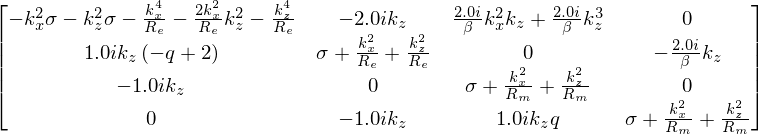

In [27]:
L_thin_nondim = Matrix([[-sigma*kx**2 - kz**2*sigma - (1/Re)*kx**4 + -2*(1/Re)*kz**2*kx**2 - (1/Re)*kz**4, -2*1j*kz, (2/beta)*1j*kz*kx**2 + (2/beta)*kz**3*1j, 0],
                 [-(q - 2)*1j*kz, sigma + (1/Re)*kx**2 + (1/Re)*kz**2, 0, -(2/beta)*1j*kz],
                 [-1j*kz, 0, sigma + (1/Rm)*kx**2 + (1/Rm)*kz**2, 0],
                 [0, -1j*kz, q*1j*kz, sigma + (1/Rm)*kx**2 + (1/Rm)*kz**2]])

L_thin_nondim

In [28]:
L_AD_nondim = Matrix([[0, 0, 0, 0],
                      [0, 0, 0, 0],
                      [0, 0, (1j*kx)**2 + (1j*kz)**2, -xi*(1j*kx)],
                      [0, 0, -xi*(1j*kx)**3 - xi*(1j*kx)*(1j*kz)**2, xi**2*(1j*kx)**2 + xi**2*(1j*kz)**2 + (1j*kz)**2]])

In [29]:
L_AD = L_thin_nondim + E*L_AD_nondim

In [30]:
AD_dispersion_relation = L_AD.det()

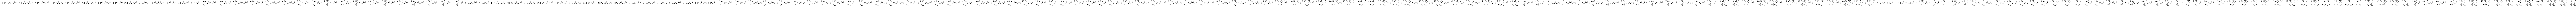

In [34]:
AD_dispersion_relation

In [35]:
func_AD_disp = lambdify((kz, Re, Rm, beta, q, xi, E), AD_dispersion_relation)

In [37]:
Qfid = 0.748
Rmfid = 4.879
Pmfid = 0.001
Refid = Rmfid/Pmfid
qfid = 1.5
betafid = 25.0
xifid = 1.0
Efid = 2

nondimparams = func_AD_disp(Qfid, Refid, Rmfid, betafid, qfid, xifid, Efid)

In [38]:
solve_thingap = lambdify(kx, nondimparams)

radial_wavenumbers = np.arange(0.01, 20, 0.5)
out_thingap = np.zeros((len(radial_wavenumbers), 4), np.complex) # four roots
for i in range(len(radial_wavenumbers)):
    hh1 = solve(solve_thingap(radial_wavenumbers[i]))
    if i == 0:
        print("there are {} modes for kr = {}".format(len(hh1), radial_wavenumbers[i]))
    out_thingap[i, 0] = hh1[0]
    out_thingap[i, 1] = hh1[1]
    
    # There sometimes appear to be only two modes. Degeneracy??
    if len(hh1) > 2:
        out_thingap[i, 2] = hh1[2]
        out_thingap[i, 3] = hh1[3]
    else:
        print("only two modes!")
        out_thingap[i, 2] = None
        out_thingap[i, 3] = None

there are 4 modes for kr = 0.01


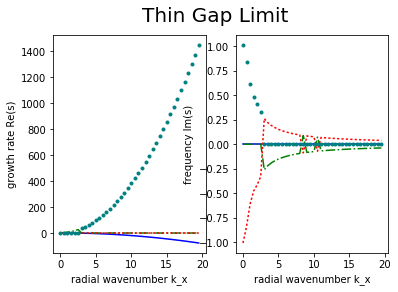

In [45]:
plt.figure()
ax = plt.subplot(121)
ax.plot(radial_wavenumbers, out_thingap[:, 0].real, color="blue")
ax.plot(radial_wavenumbers, out_thingap[:, 1].real, '-.', color="green")
ax.plot(radial_wavenumbers, out_thingap[:, 2].real, ':', color="red")
ax.plot(radial_wavenumbers, out_thingap[:, 3].real, '.', color="teal")
#ax.set_ylim(-1000, 200)

ax.set_xlabel('radial wavenumber k_x')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(radial_wavenumbers, out_thingap[:, 0].imag, color="blue")
ax.plot(radial_wavenumbers, out_thingap[:, 1].imag, '-.', color="green")
ax.plot(radial_wavenumbers, out_thingap[:, 2].imag, ':', color="red")
ax.plot(radial_wavenumbers, out_thingap[:, 3].imag, '.', color="teal")

ax.set_xlabel('radial wavenumber k_x')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Thin Gap Limit", size=20)

1446.69643455
[ 2.51]
[[ 26.24307127+0.j]]


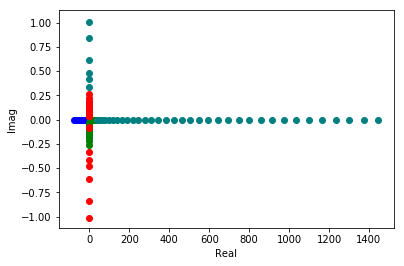

In [46]:
plt.scatter(out_thingap[:, 0].real, out_thingap[:, 0].imag, color="blue")
plt.scatter(out_thingap[:, 1].real, out_thingap[:, 1].imag, color="green")
plt.scatter(out_thingap[:, 2].real, out_thingap[:, 2].imag, color="red")
plt.scatter(out_thingap[:, 3].real, out_thingap[:, 3].imag, color="teal")
plt.xlabel('Real')
plt.ylabel('Imag')
print(np.max(out_thingap.real))
indx = np.where(out_thingap.real[:, 1] == np.max(out_thingap[:, 1].real))
print(radial_wavenumbers[indx])
print(out_thingap[indx, 1])